In [1]:
import numpy as np
import cv2
from skimage import io, color
from matplotlib import pyplot as plt

# Nomor 1

### 1a

#### Ambil 1 gambar dari fire dragon dan water dragon

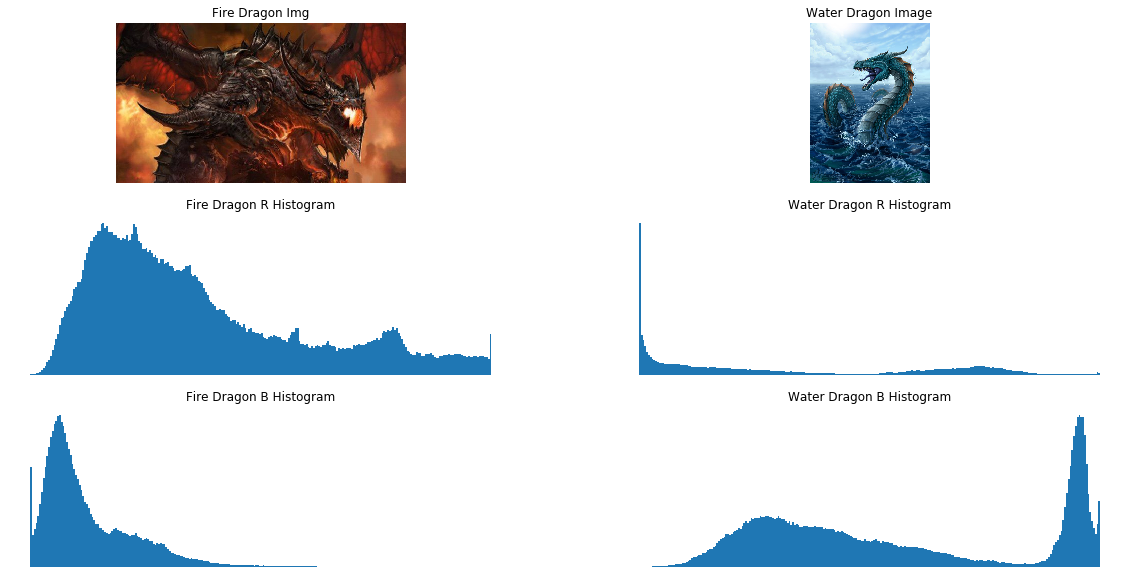

In [2]:
fire_dragon_img = io.imread('Tugas Lab 5 - Images/fire_dragon/5.jpg')
water_dragon_img = io.imread('Tugas Lab 5 - Images/water_dragon/5.jpg')
R_fire_dragon = fire_dragon_img[:,:,0]
B_fire_dragon = fire_dragon_img[:,:,2]
R_water_dragon = water_dragon_img[:,:,0]
B_water_dragon = water_dragon_img[:,:,2]

# Show image
plt.figure(figsize=(20,10))
plt.subplot(3, 2, 1)
plt.title('Fire Dragon Img')
plt.imshow(fire_dragon_img)
plt.axis('off')
plt.subplot(3, 2, 2)
plt.title('Water Dragon Image')
plt.imshow(water_dragon_img)
plt.axis('off')
plt.subplot(3, 2, 3)
plt.title('Fire Dragon R Histogram')
plt.hist(R_fire_dragon.flatten(), 256, range=(0,255))
plt.axis('off')
plt.subplot(3, 2, 4)
plt.title('Water Dragon R Histogram')
plt.hist(R_water_dragon.flatten(), 256, range=(0,255))
plt.axis('off')
plt.subplot(3, 2, 5)
plt.title('Fire Dragon B Histogram')
plt.hist(B_fire_dragon.flatten(), 256, range=(0,255))
plt.axis('off')
plt.subplot(3, 2, 6)
plt.title('Water Dragon B Histogram')
plt.hist(B_water_dragon.flatten(), 256, range=(0,255))
plt.axis('off')
plt.show()


#### buat fungsi prediksi

In [3]:
def predict(file_name):
    img = io.imread(file_name)
    r_img = img[:,:,0]
    b_img = img[:,:,2]
    r_frequency_count = np.bincount(r_img.flatten())
    b_frequency_count = np.bincount(b_img.flatten())
    r_cum_sum = np.cumsum(r_frequency_count)
    b_cum_sum = np.cumsum(b_frequency_count)
    if r_cum_sum[127] < (r_cum_sum[-1] - r_cum_sum[127]) and  b_cum_sum[127] > (b_cum_sum[-1] - b_cum_sum[127]):
        return 'fire dragon'
    elif r_cum_sum[127] > (r_cum_sum[-1] - r_cum_sum[127]) and  b_cum_sum[127] < (b_cum_sum[-1] - b_cum_sum[127]):
        return 'water dragon'
    elif r_cum_sum[127] > (r_cum_sum[-1] - r_cum_sum[127]) and  b_cum_sum[127] > (b_cum_sum[-1] - b_cum_sum[127]):
        if(r_cum_sum[127]/r_cum_sum[-1]>b_cum_sum[127]/b_cum_sum[-1]):
            return 'water dragon'
        else:
            return 'fire dragon'
    else:
        if (r_cum_sum[-1] - r_cum_sum[127])/r_cum_sum[-1]>(b_cum_sum[-1] - b_cum_sum[127])/b_cum_sum[-1]:
            return 'fire dragon'
        else:
            return 'water dragon'

#### Prediksi citra

In [4]:
import os
folders = ['Tugas Lab 5 - Images/fire_dragon', 'Tugas Lab 5 - Images/water_dragon']
for folder in folders:
    for filename in os.listdir(folder):
        filename = f'{folder}/{filename}'
        print(f'image {filename} predicted as {predict(filename)}')


image Tugas Lab 5 - Images/fire_dragon/1.jpg predicted as fire dragon
image Tugas Lab 5 - Images/fire_dragon/2.jpg predicted as fire dragon
image Tugas Lab 5 - Images/fire_dragon/3.jpg predicted as fire dragon
image Tugas Lab 5 - Images/fire_dragon/4.jpg predicted as fire dragon
image Tugas Lab 5 - Images/fire_dragon/5.jpg predicted as fire dragon
image Tugas Lab 5 - Images/water_dragon/1.jpg predicted as water dragon
image Tugas Lab 5 - Images/water_dragon/2.jpg predicted as water dragon
image Tugas Lab 5 - Images/water_dragon/3.jpg predicted as water dragon
image Tugas Lab 5 - Images/water_dragon/4.jpg predicted as water dragon
image Tugas Lab 5 - Images/water_dragon/5.jpg predicted as water dragon


### 1b Penjelasan

Dalam mengidentifikasikan naga api dan naga air, kami mengidentifikasikan citra dengan melihat warna biru dan merah dari gambar. 
* Untuk gambar naga api, lebih cenderung menghasilkan warna merah sehingga dilihat dari image histogramnya, maka histogram untuk channel red cenderung ke kanan dan histogram untuk channel blue cenderung ke kiri.
* Untuk gambar naga air, lebih cenderung menghasilkan warna biru sehingga dilihat dari image histogramnya, maka histogram untuk channel blue cenderung ke kanan dan histogram untuk channel red cenderung ke kiri.
* Untuk channel red dan blue yang cenderung ke kiri, kami melihat dari persentase histogram channel red dan blue yang berada di kiri. Jika persentase channel red yang berada disebelah kiri lebih besar daripada channel blue, maka kami mengidentifikasikan gambar sebagai gambar naga air. Jika persentase channel red yang berada disebelah kiri lebih kecil daripada channel blue, maka kami mengidentifikasikan gambar sebagai gambar naga api. Alasan kami mengidentifikasikan jika channel red disebelah kiri lebih besar dari channel blue menjadi naga air karna itu berarti gambar lebih memiliki kecenderungan kearah biru meskipun biru tersebut biru agak gelap. Naga air memiliki gambar lebih dominan warna biru.
* Untuk channel red dan blue yang cenderung ke kanan, kami melihat dari persentase histogram channel red dan blue yang berada di kanan. Jika persentase channel red yang berada disebelah kanan lebih besar daripada channel blue, maka kami mengidentifikasikan gambar sebagai gambar naga api.Jika persentase channel red yang berada disebelah kanan lebih kecil daripada channel blue, maka kami mengidentifikasikan gambar sebagai gambar naga air. Alasan kami mengidentifikasikan jika channel red disebelah kanan lebih besar dari channel blue menjadi naga api karna itu berarti gambar lebih memiliki kecenderungan kearah merah meskipun merah tersebut merah agak gelap. Naga api memiliki gambar lebih dominan warna merah.

## Nomor 2

In [23]:
def predictHoughTransformation(file_name):
    img = io.imread(file_name)
    original_image = np.copy(img)
    # convert image to gray
    gray = (color.rgb2gray(img) * 255).astype(np.uint8)
    # find all of the edges using canny
    edges = cv2.Canny(gray, 150, 150, apertureSize=3)
    # find all of the lines using hough transformation
    lines = cv2.HoughLines(edges, 1, np.pi/180, 200)
    # plotting line
    countVertical = 0
    countHorizontal = 0
    for line in lines:
        for rho,theta in line:
            if (theta==0):
                countVertical += 1
            else:
                countHorizontal +=1
    if(countVertical>=16):
        return 'sudoku'
    else:
        return 'tic tac toe'

In [24]:
folders = ['Tugas Lab 5 - Images/sudoku', 'Tugas Lab 5 - Images/tic_tac_toe']
for folder in folders:
    for filename in os.listdir(folder):
        filename = f'{folder}/{filename}'
        print(f'image {filename} predicted as {predictHoughTransformation(filename)}')


image Tugas Lab 5 - Images/sudoku/1.jpg predicted as sudoku
image Tugas Lab 5 - Images/sudoku/2.jpg predicted as sudoku
image Tugas Lab 5 - Images/sudoku/3.jpg predicted as sudoku
image Tugas Lab 5 - Images/sudoku/4.jpg predicted as sudoku
image Tugas Lab 5 - Images/sudoku/5.jpg predicted as sudoku
image Tugas Lab 5 - Images/tic_tac_toe/1.png predicted as tic tac toe
image Tugas Lab 5 - Images/tic_tac_toe/2.png predicted as tic tac toe
image Tugas Lab 5 - Images/tic_tac_toe/3.jpg predicted as tic tac toe
image Tugas Lab 5 - Images/tic_tac_toe/4.jpg predicted as tic tac toe
image Tugas Lab 5 - Images/tic_tac_toe/5.png predicted as tic tac toe


#### Penjelasan

Untuk mendeteksi perbedaan antara sudoku dan tic tac toe, kami membedakannya dengan cara menghitung jumlah garis vertikal dari citra. Jikalau citra tersebut memiliki jumlah garis vertikal lebih besar atau sama dengan 16, maka program tersebut terdeteksi sebagai sudoku. Alasan kami memilih 16 ialah karna dalam sudoku terdapat 8 garis yang memisahkan 1 kotak dengan kotak lain secara horizontal. Karna dalam menghitung garis menggunakan hough lines terhitung 2 kali untuk 1 garis, makanya kami membuat jumlah minimalnya ialah 16.

## Nomor 3

In [49]:
def templateMatching(threshold):
    # Import citra yang dibutuhkan
    citra_sayuran = cv2.cvtColor(cv2.imread('Tugas Lab 5 - Images/sayuran.jpg'),cv2.COLOR_BGR2RGB)
    citra_kol = cv2.cvtColor(cv2.imread('Tugas Lab 5 - Images/kol.jpg'),cv2.COLOR_BGR2RGB)

    # Ubah gray
    citra_sayuran_gray = cv2.cvtColor(citra_sayuran, cv2.COLOR_RGB2GRAY)
    citra_kol_gray = cv2.cvtColor(citra_kol, cv2.COLOR_RGB2GRAY)

    # Menyimpan width dan height template
    w, h = citra_kol_gray.shape[::-1]

    # Apply template matching
    # parameter ketiga merupakan method, bisa melihat dokumentasi openCV untuk penjelasan lebih lanjut dan pilihan method lainnya
    res = cv2.matchTemplate(citra_sayuran_gray, citra_kol_gray, cv2.TM_CCOEFF_NORMED)
    # Copy citra monas untuk ditandai bounding box
    template_matched = citra_sayuran.copy()
    loc = np.where( res >= threshold)
    # Buat bounding box dengan rectangle. Rectangle memiliki 4 parameter yaitu (image, start_point, end_point, color, thickness)
    for point in zip(*loc[::-1]):
        cv2.rectangle(template_matched, point, (point[0] + w, point[1] + h), (0,0,255), 2)
    # Menampilkan citra
    plt.figure(figsize=(20,10))
    plt.subplot(131)
    plt.imshow(citra_sayuran)
    plt.title('Citra Sayuran')
    plt.xticks([])
    plt.yticks([])
    plt.subplot(1,3,2)
    plt.imshow(citra_kol)
    plt.title('Citra Kol')
    plt.xticks([]), plt.yticks([])
    plt.subplot(1,3,3)
    plt.imshow(template_matched)
    plt.title('Template Matched')
    plt.xticks([])
    plt.yticks([])
    plt.show()



#### Tracehold 0,9

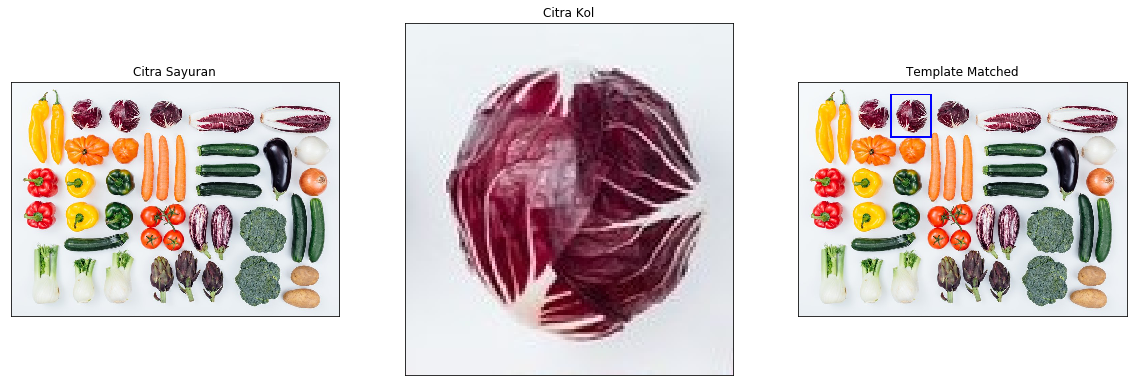

In [50]:
tracehold = 0.9
templateMatching(tracehold)

#### Tracehold 0.7

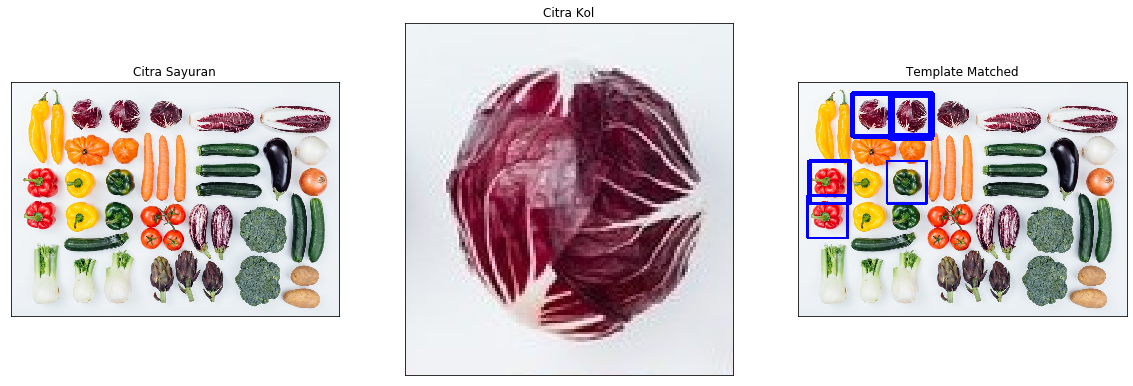

In [17]:
tracehold = 0.7
templateMatching(tracehold)

#### Tracehold 0.5

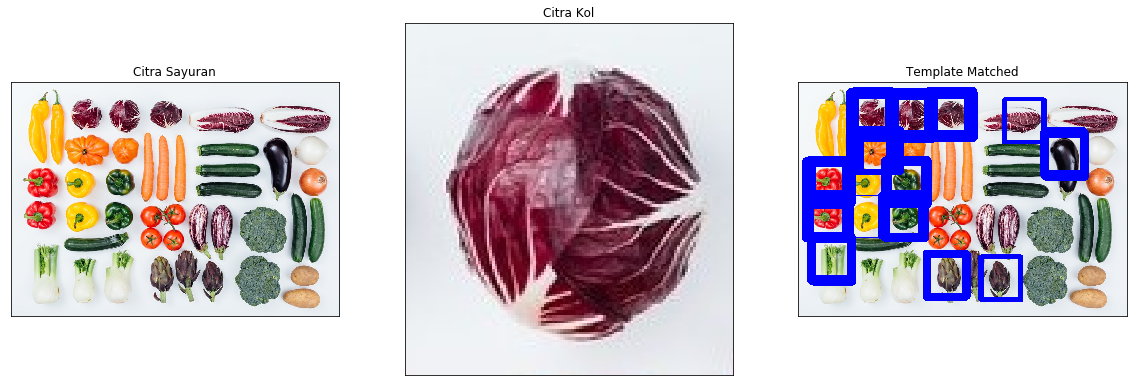

In [51]:
tracehold = 0.5
templateMatching(tracehold)

#### 3b Perbedaan

Dalam gambar terdapat perbedaan tracehold. Yang menjadi pembeda antara satu tracehold dengan tracehold yang lain ialah hasil yang didapatkan. Pada tracehold 0.9, kami mendapatkan bahwa terdapat 1 gambar yang dideteksi sebagai kol dan benar. Pada tracehold 0.7, kami mendapatkan bahwa terdapat 5 gambar yang dideteksi sebagai kol namun hanya 2 dari 5 gambar tersebut yang benar gambar kol. Pada tracehold 0.5, kami mendapatkan bahwa terdapat 13 gambar yang dideteksi sebagai kol namum hanya 3 dari 13 gambar tersebut yang merupakan kol. Kesimpulan yang kami dapatkan ialah semakin tracehold mendekati 1, maka sudah bisa dipastikan bahwa itu merupakan kol. Namun jika ada kol yang berubah posisi atau memiliki bentuk yang berbeda dengan template, maka program akan sulit memprediksi apakah gambar tersebut ialah kol.

#### 3c Kelebihan dan Kekurangan

Kelebihan:
* Untuk benda yang bentuknya tidak banyak jenis bentuk dari benda tersebut, maka kita bisa memprediksi gambar dengan baik

Kekurangan:
* Jika gambar tersebut diputar, maka program sulit untuk mendeteksi gambar tersebut.
* Jika gambar memiliki bentuk yang agak berbeda, maka program sulit mendeteksi gambar.